# IMPORTING DATA AND ANALYSING IT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv("train.csv",index_col=0,low_memory=False)

In [3]:
df.head()

,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
Id,,,,,,,,
1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0
2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0
3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0
4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0
5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969640 entries, 1 to 969640
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   County          880040 non-null  object 
 1   Province_State  917280 non-null  object 
 2   Country_Region  969640 non-null  object 
 3   Population      969640 non-null  int64  
 4   Weight          969640 non-null  float64
 5   Date            969640 non-null  object 
 6   Target          969640 non-null  object 
 7   TargetValue     969640 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 66.6+ MB


In [5]:
df.describe() #summary of all numerical values in the data like count, mean, min, etc.

,Population,Weight,TargetValue
count,9.696400e+05,969640.000000,969640.000000
mean,2.720127e+06,0.530870,12.563518
std,3.477771e+07,0.451909,302.524795
min,8.600000e+01,0.047491,-10034.000000
25%,1.213300e+04,0.096838,0.000000
50%,3.053100e+04,0.349413,0.000000
75%,1.056120e+05,0.968379,0.000000
max,1.395773e+09,2.239186,36163.000000


In [6]:
df.shape #shape of the dataset(number of rows, number of columns)

(969640, 8)

In [7]:
df.isnull().sum() #hence there are 89600 missing values in Country and 52360 missing values in Province_State

County            89600
Province_State    52360
Country_Region        0
Population            0
Weight                0
Date                  0
Target                0
TargetValue           0
dtype: int64

In [8]:
a=df.Country_Region.unique()
len(a)  #hence total 187 countries in dataset

187

In [9]:
b=df.Target.unique()
print(b)

['ConfirmedCases' 'Fatalities']


In [10]:
df.TargetValue.unique()

array([   0,    1,    3, ..., 1650, 1326,  -21], dtype=int64)

# DROPPING MISSING VALUES FROM DATA

In [11]:
df.drop(['County','Province_State'],axis=1,inplace=True) #dropping the columns with nan values in them

In [12]:
df.head()

,Country_Region,Population,Weight,Date,Target,TargetValue
Id,,,,,,
1,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0
2,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0
3,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0
4,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0
5,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0


In [13]:
df['Date'].describe()

count         969640
unique           140
top       2020-02-06
freq            6926
Name: Date, dtype: object

In [14]:
#converting the date column into 2 columns Month and Day for ease purpose and then dropping date column
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x :x.month)
df['Day']=df['Date'].apply(lambda x :x.day)
df.drop(['Date'],axis=1,inplace=True)

In [15]:
df.head()

,Country_Region,Population,Weight,Target,TargetValue,Month,Day
Id,,,,,,,
1,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,23
2,Afghanistan,27657145,0.583587,Fatalities,0,1,23
3,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,24
4,Afghanistan,27657145,0.583587,Fatalities,0,1,24
5,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,25


In [16]:
confirmed=df.loc[df['Target']=='ConfirmedCases']
fatalities=df.loc[df['Target'] == 'Fatalities']
# Divide dataset into 2 dataframes of data as confirmed and fatalities based on Target

In [17]:
#total number of confirmer cases
total_case=confirmed['TargetValue'].sum()
#total number of fatalities
total_death=fatalities['TargetValue'].sum()
print(total_case, total_death)

11528819 653271


In [18]:
confirmed.head()

,Country_Region,Population,Weight,Target,TargetValue,Month,Day
Id,,,,,,,
1,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,23
3,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,24
5,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,25
7,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,26
9,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,27


In [19]:
fatalities.head()

,Country_Region,Population,Weight,Target,TargetValue,Month,Day
Id,,,,,,,
2,Afghanistan,27657145,0.583587,Fatalities,0,1,23
4,Afghanistan,27657145,0.583587,Fatalities,0,1,24
6,Afghanistan,27657145,0.583587,Fatalities,0,1,25
8,Afghanistan,27657145,0.583587,Fatalities,0,1,26
10,Afghanistan,27657145,0.583587,Fatalities,0,1,27


# PLOTTING DIFFERENT PLOTS FOR VISUALIZATION OF DATA

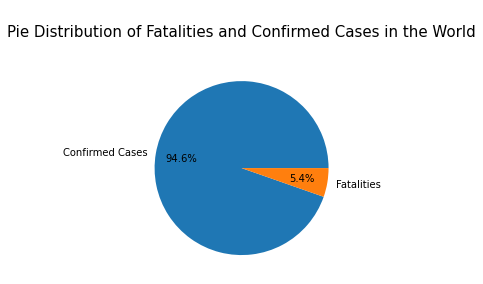

In [20]:
#plotting a pi chart of confirmed cases vs fatalities
plt.pie(x=[total_case,total_death],labels=['Confirmed Cases','Fatalities'],pctdistance=0.7, autopct='%1.1f%%',labeldistance=1.1, data=df)
plt.title('\nPie Distribution of Fatalities and Confirmed Cases in the World\n',loc='center',fontsize=15)
plt.show()

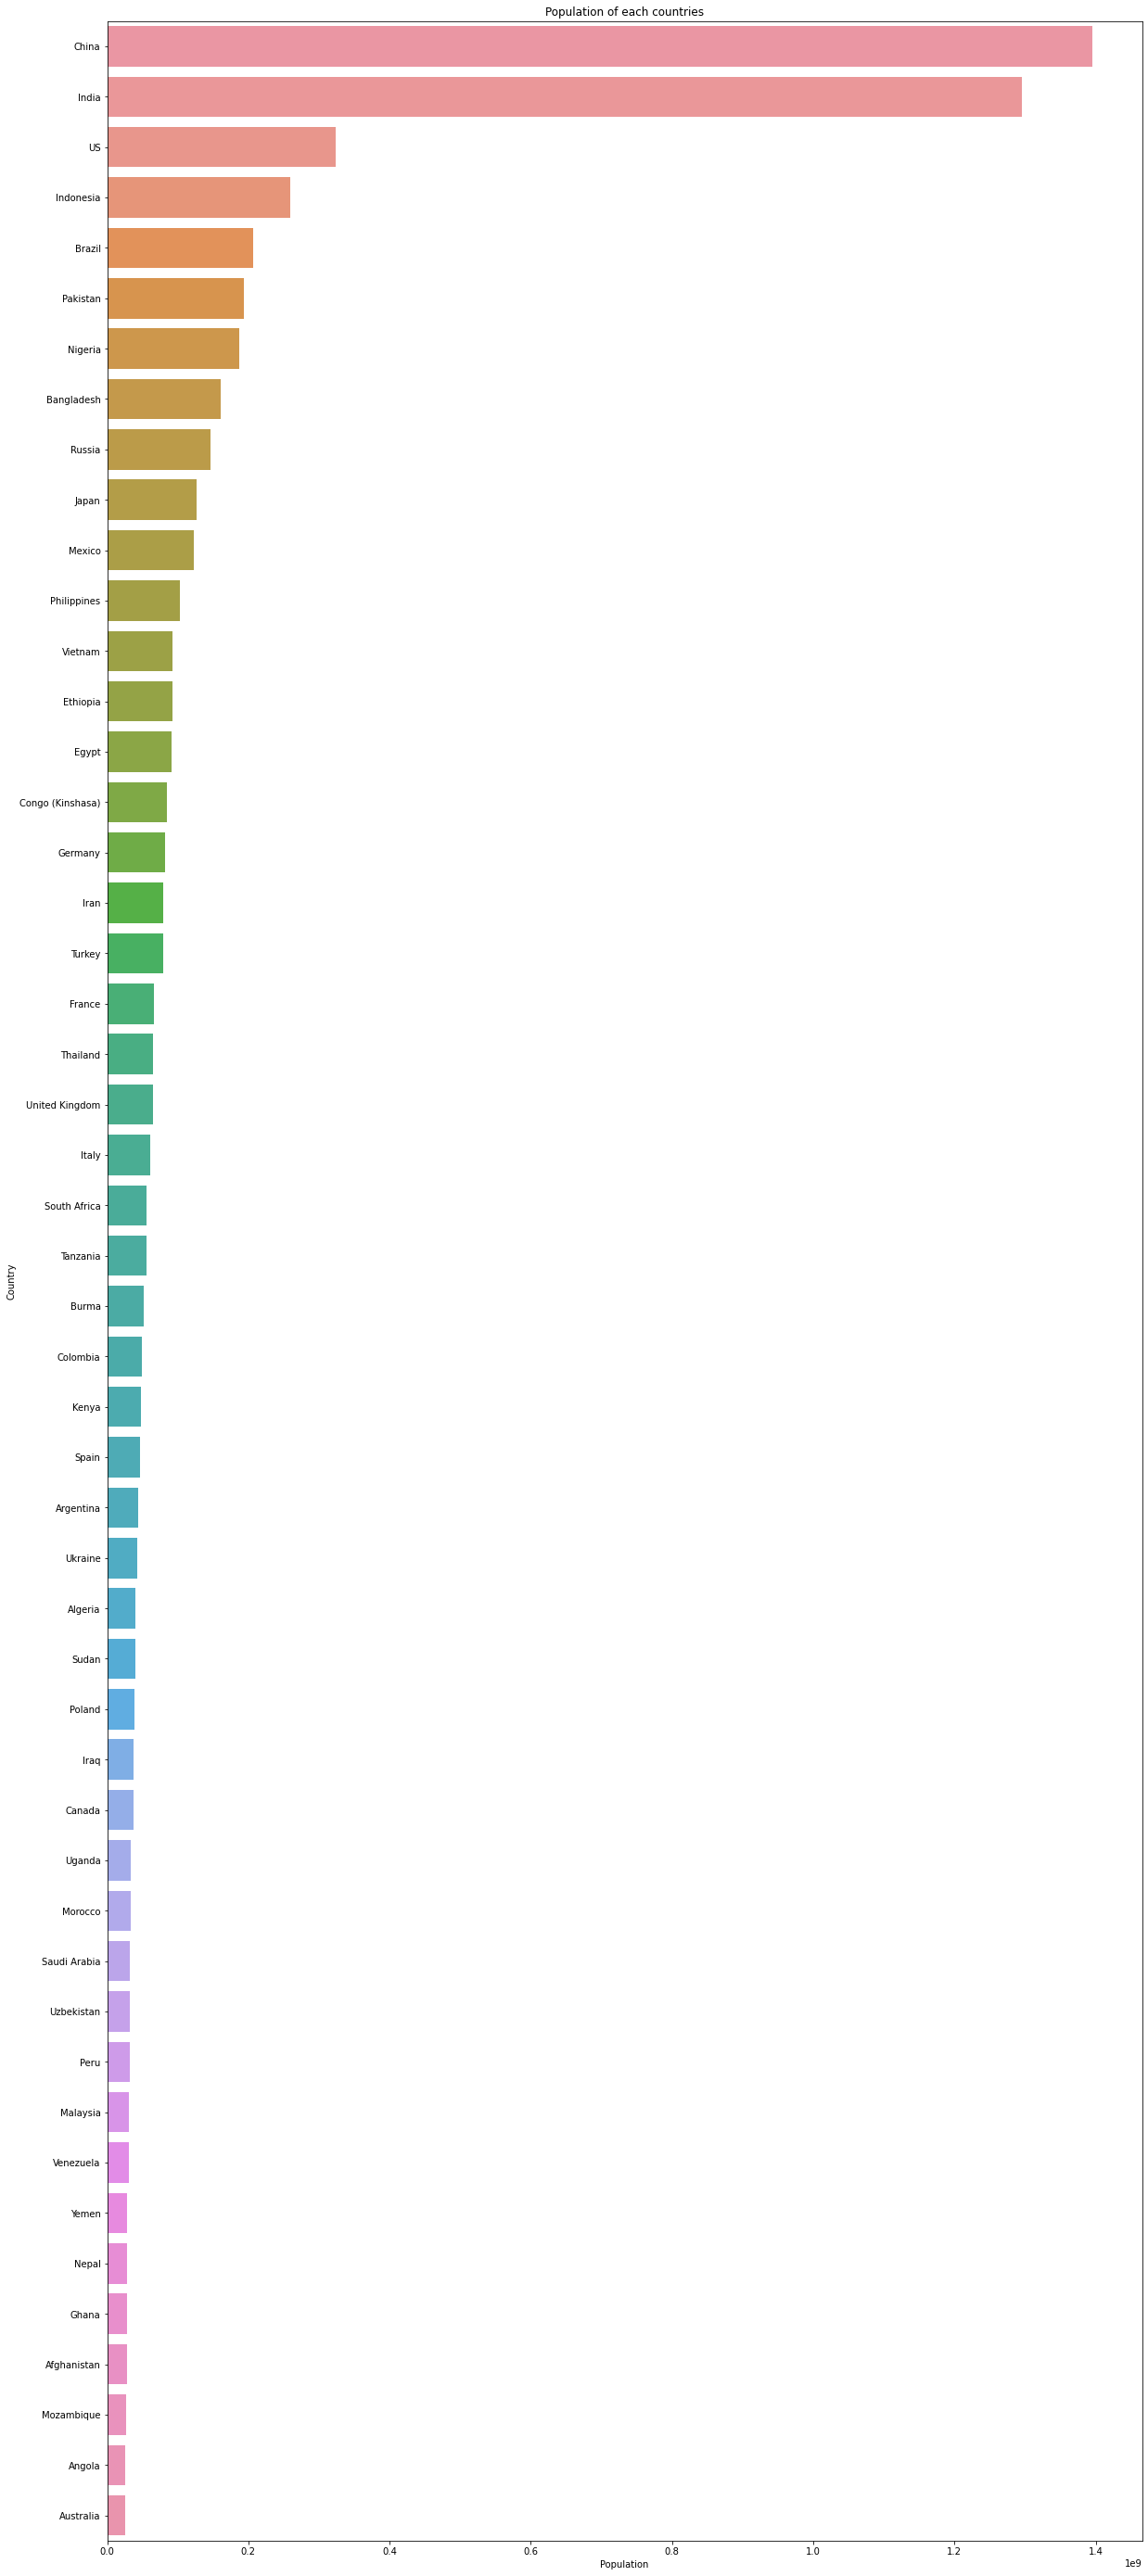

In [21]:
#plotting to 50 countries with highest population
a=df.groupby('Country_Region').max().sort_values(by='Population',ascending=False).head(50)
plt.figure(figsize=(20,50))
sns.barplot(y=list(a.index),x='Population', data=a)
plt.xlabel('Population')
plt.ylabel('Country')
plt.title('Population of each countries')
plt.show()

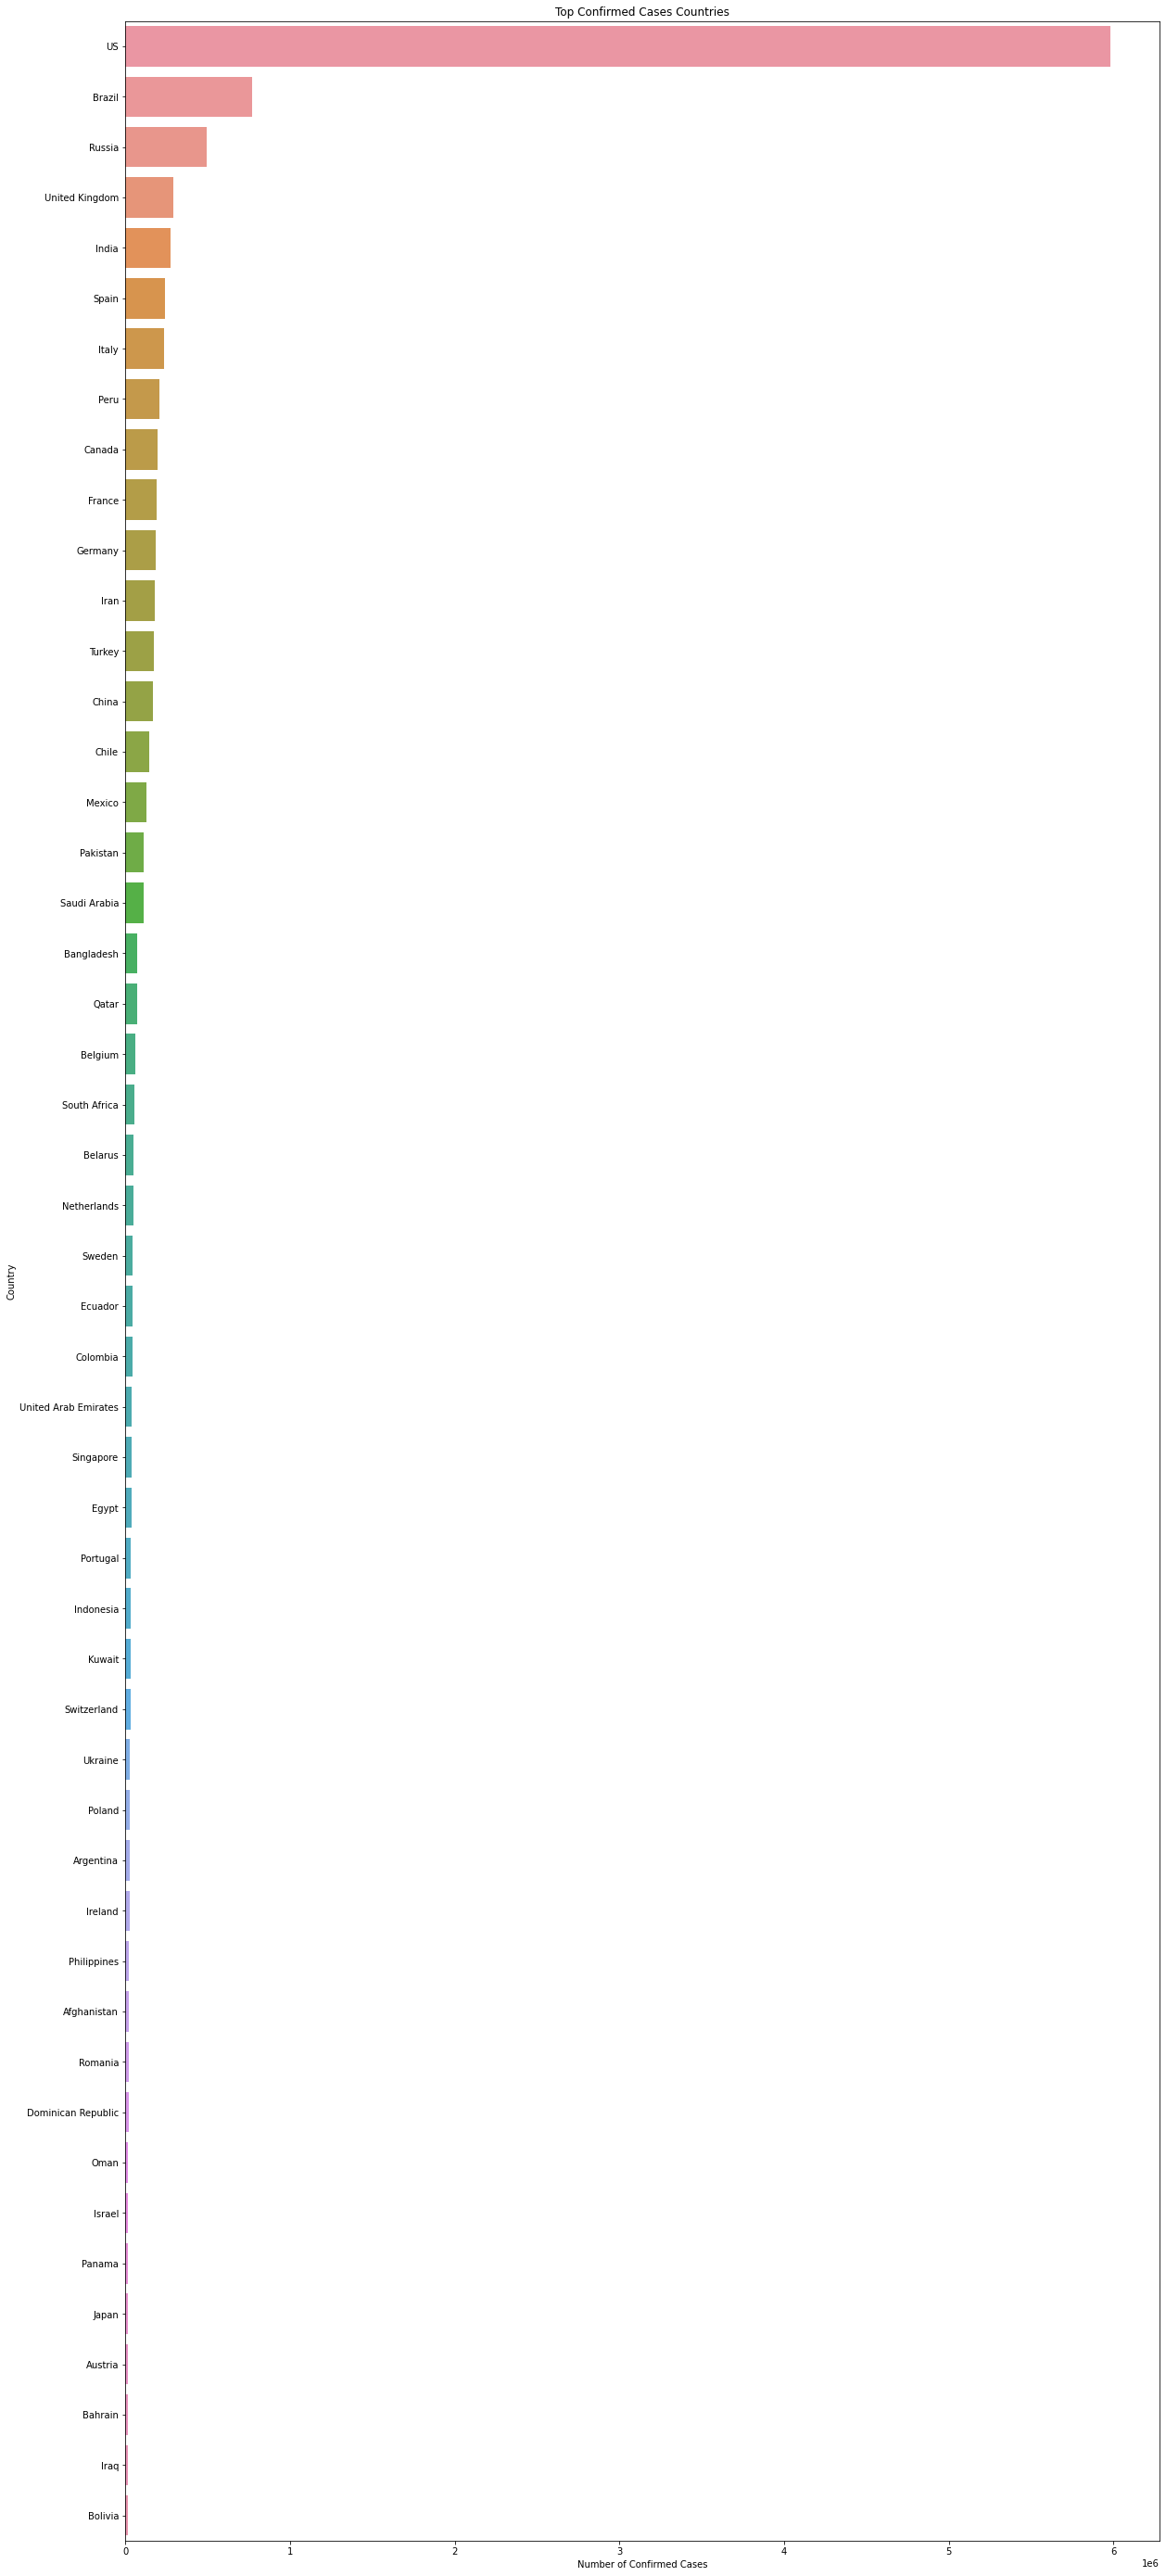

In [22]:
#plotting top 50 countries with number of confirmed cases
b=confirmed.groupby('Country_Region').sum().sort_values(by='TargetValue',ascending=False).head(50)
plt.figure(figsize=(20,50))
sns.barplot(y=list(b.index),x='TargetValue', data=b)
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Country')
plt.title('Top Confirmed Cases Countries')
plt.show()

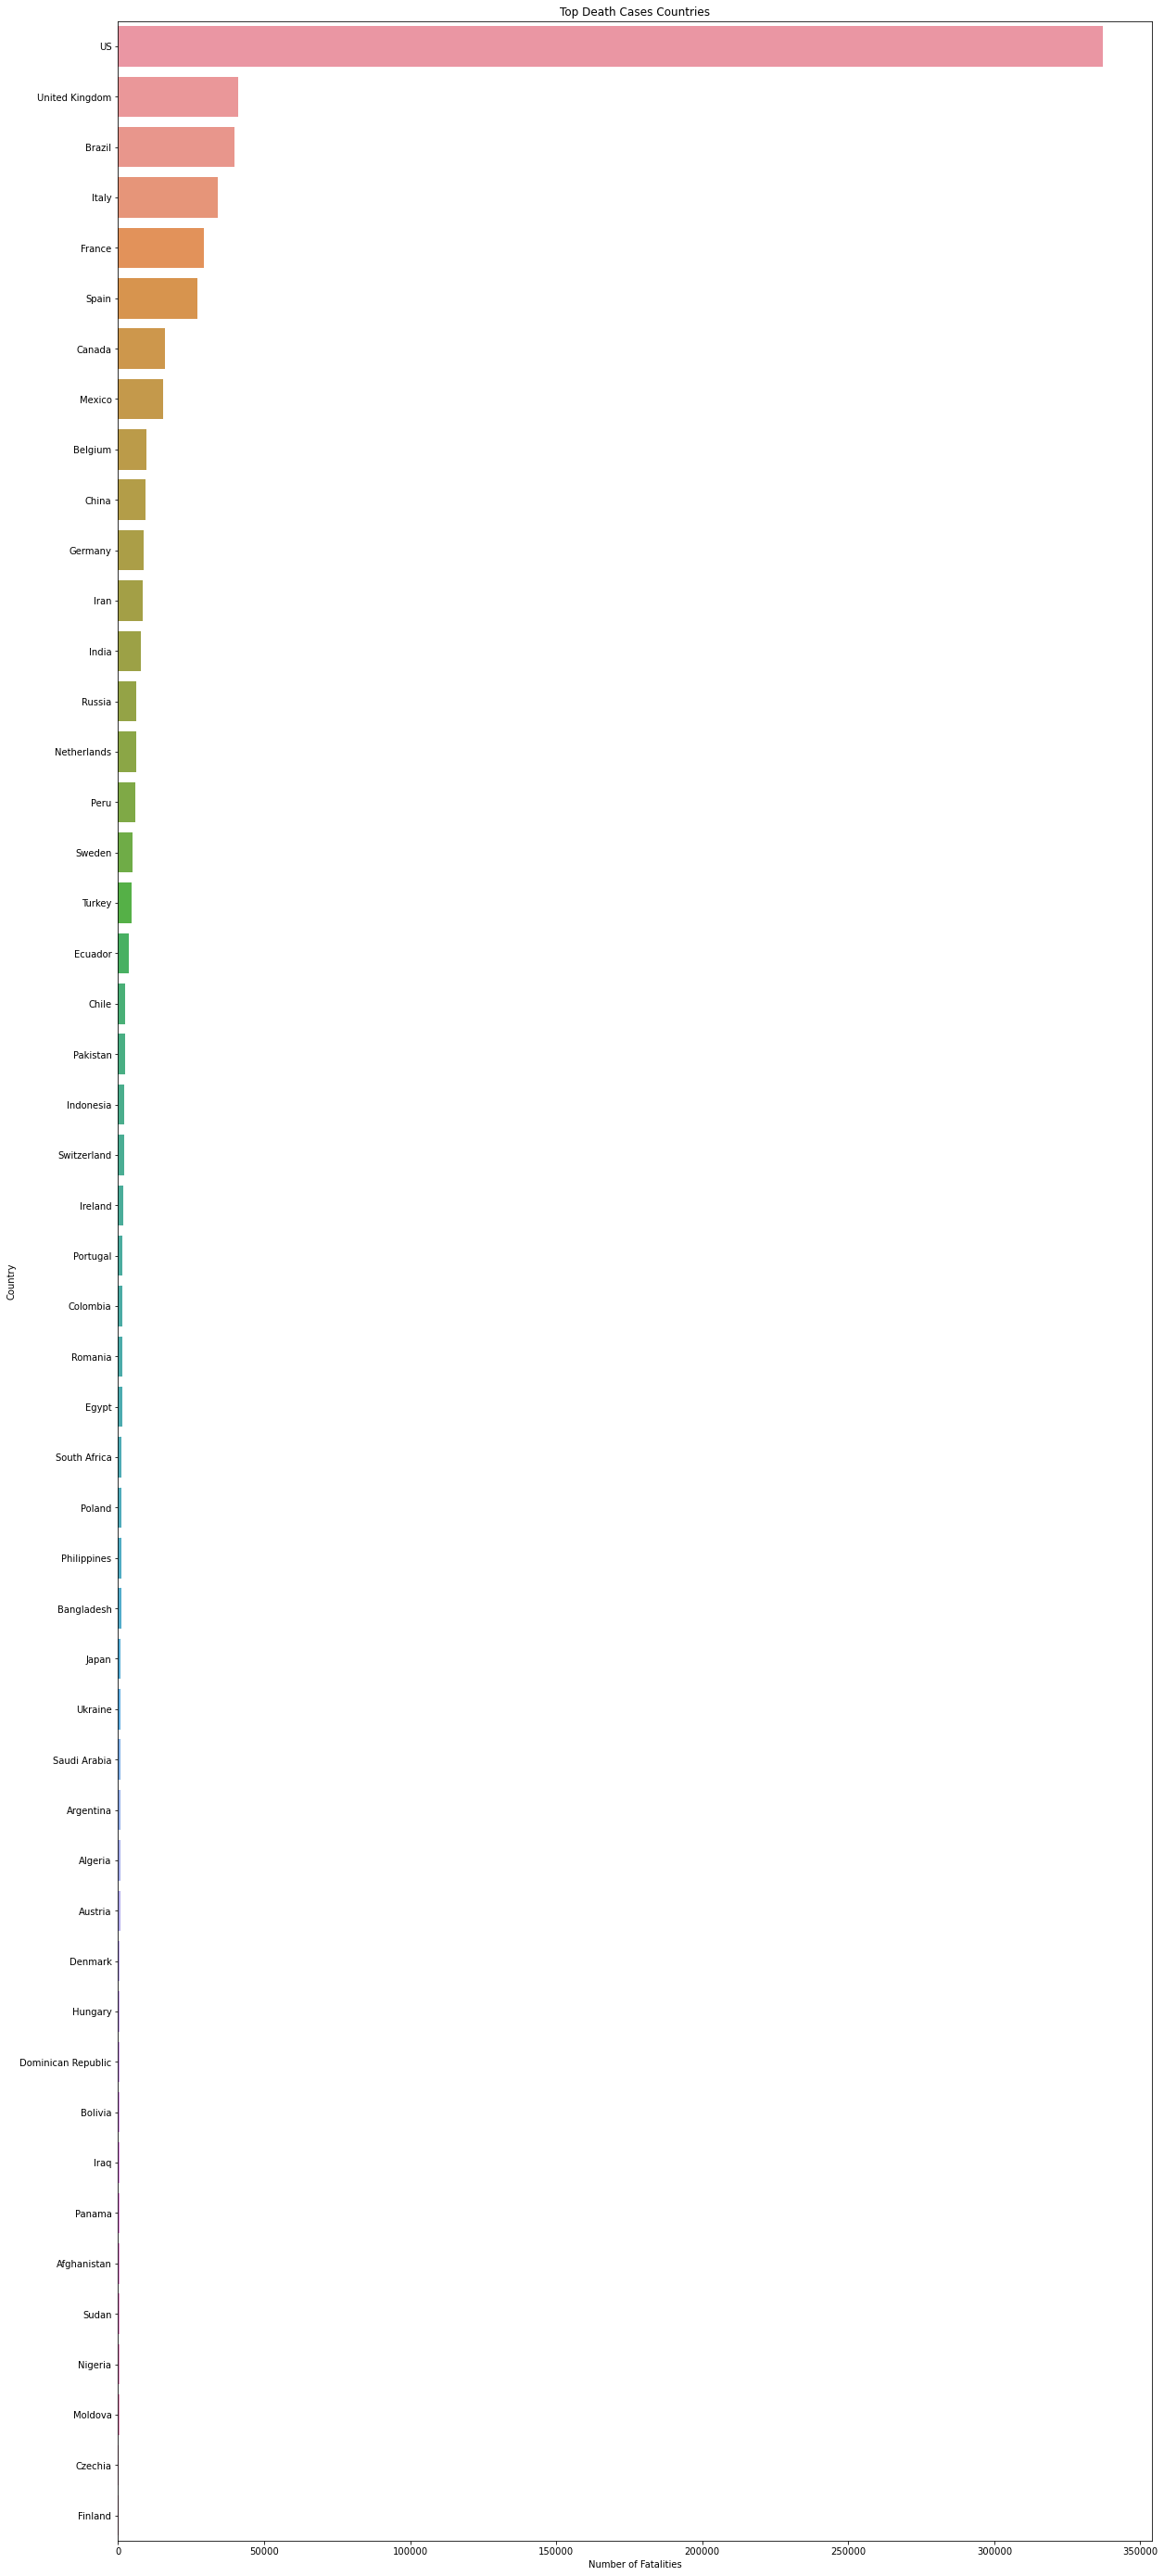

In [23]:
#plotting top 50 countries with number of fatalities(Deaths)
c=fatalities.groupby('Country_Region').sum().sort_values(by='TargetValue',ascending=False).head(50)
plt.figure(figsize=(20,50))
sns.barplot(y=list(c.index),x='TargetValue', data=c)
plt.xlabel('Number of Fatalities')
plt.ylabel('Country')
plt.title('Top Death Cases Countries')
plt.show()

<AxesSubplot:xlabel='Target', ylabel='TargetValue'>

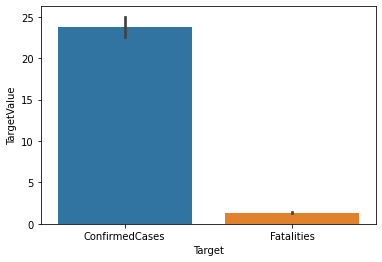

In [24]:
#plot for target value of confirmed cases vs fatalities
sns.barplot(x='Target',y='TargetValue',data=df)

In [26]:
#now mapping number of confirmed cases and fataities in each month
confirmed_month_value=confirmed[['TargetValue','Month']]
sum_confirmed_month_value=confirmed_month_value.groupby('Month').sum()
sum_confirmed_month_value.columns=['Confirmed Cases']
fatalities_month_value=fatalities[['TargetValue','Month']]
sum_fatalities_month_value=fatalities_month_value.groupby('Month').sum()
sum_fatalities_month_value.columns=['Fatality Cases']

In [27]:
sum_confirmed_month_value

,Confirmed Cases
Month,
1,18639
2,145626
3,1157538
4,4209995
5,4383055
6,1613966


In [29]:
#merge confirmed cases and deaths on basis of Months
confirmed_vs_death=pd.merge(sum_confirmed_month_value,sum_fatalities_month_value, on='Month')
print(confirmed_vs_death)

       Confirmed Cases  Fatality Cases
Month                                 
1                18639             392
2               145626            5352
3              1157538           48971
4              4209995          311938
5              4383055          224876
6              1613966           61742


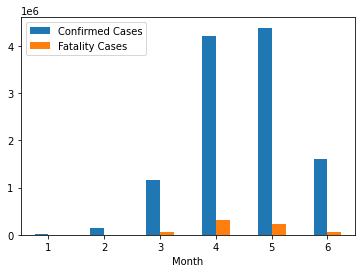

In [30]:
graph=confirmed_vs_death.plot.bar(rot=0)

# SOME ANALYSIS ON DATA

In [31]:
df.head()

,Country_Region,Population,Weight,Target,TargetValue,Month,Day
Id,,,,,,,
1,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,23
2,Afghanistan,27657145,0.583587,Fatalities,0,1,23
3,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,24
4,Afghanistan,27657145,0.583587,Fatalities,0,1,24
5,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,25


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969640 entries, 1 to 969640
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country_Region  969640 non-null  object 
 1   Population      969640 non-null  int64  
 2   Weight          969640 non-null  float64
 3   Target          969640 non-null  object 
 4   TargetValue     969640 non-null  int64  
 5   Month           969640 non-null  int64  
 6   Day             969640 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 99.2+ MB


In [33]:
df.describe()

,Population,Weight,TargetValue,Month,Day
count,9.696400e+05,969640.000000,969640.000000,969640.000000,969640.000000
mean,2.720127e+06,0.530870,12.563518,3.535714,15.642857
std,3.477771e+07,0.451909,302.524795,1.385697,9.098726
min,8.600000e+01,0.047491,-10034.000000,1.000000,1.000000
25%,1.213300e+04,0.096838,0.000000,2.000000,7.750000
50%,3.053100e+04,0.349413,0.000000,4.000000,15.500000
75%,1.056120e+05,0.968379,0.000000,5.000000,24.000000
max,1.395773e+09,2.239186,36163.000000,6.000000,31.000000


In [34]:
#Group Or Add Every Rows With Same Country Region
df_grouped=df.groupby(['Country_Region']).sum()
df_grouped.TargetValue

Country_Region
Afghanistan           22547
Albania                1375
Algeria               11216
Andorra                 903
Angola                  117
                      ...  
West Bank and Gaza      488
Western Sahara           10
Yemen                   689
Zambia                 1210
Zimbabwe                324
Name: TargetValue, Length: 187, dtype: int64

In [35]:
#getting top 5 countries with highest target value
top5=df_grouped.nlargest(5,'TargetValue')
top5

,Population,Weight,TargetValue,Month,Day
Country_Region,,,,,
US,275441475400,487062.137119,6317214,3166020,14007240
Brazil,57718050040,80.442765,812096,990,4380
Russia,41047771240,81.900897,499373,990,4380
United Kingdom,18368147000,1614.560552,332801,10890,48180
India,362658800000,73.396459,284328,990,4380


# APPLYING ML MODELS TO DATA FOR PREDICTIONS

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
#making a copy of df dataset as df1
df1=df.copy(deep=True)

In [39]:
df1

,Country_Region,Population,Weight,Target,TargetValue,Month,Day
Id,,,,,,,
1,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,23
2,Afghanistan,27657145,0.583587,Fatalities,0,1,23
3,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,24
4,Afghanistan,27657145,0.583587,Fatalities,0,1,24
5,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,25
...,...,...,...,...,...,...,...
969636,Zimbabwe,14240168,0.607106,Fatalities,0,6,8
969637,Zimbabwe,14240168,0.060711,ConfirmedCases,27,6,9
969638,Zimbabwe,14240168,0.607106,Fatalities,0,6,9


In [40]:
#Encoding the string data in Country_Region as integers using LabelEncoder() function from sklearn package
from sklearn import preprocessing
le1=preprocessing.LabelEncoder()

In [41]:
le1.fit(df1['Country_Region'])

LabelEncoder()

In [42]:
df1

,Country_Region,Population,Weight,Target,TargetValue,Month,Day
Id,,,,,,,
1,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,23
2,Afghanistan,27657145,0.583587,Fatalities,0,1,23
3,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,24
4,Afghanistan,27657145,0.583587,Fatalities,0,1,24
5,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,25
...,...,...,...,...,...,...,...
969636,Zimbabwe,14240168,0.607106,Fatalities,0,6,8
969637,Zimbabwe,14240168,0.060711,ConfirmedCases,27,6,9
969638,Zimbabwe,14240168,0.607106,Fatalities,0,6,9


In [43]:
#adding a column Encoded_Country to dataset with encoded data from country_region
df1['Encoded_Country']=le1.transform(df1['Country_Region'])

In [44]:
df1

,Country_Region,Population,Weight,Target,TargetValue,Month,Day,Encoded_Country
Id,,,,,,,,
1,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,23,0
2,Afghanistan,27657145,0.583587,Fatalities,0,1,23,0
3,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,24,0
4,Afghanistan,27657145,0.583587,Fatalities,0,1,24,0
5,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,25,0
...,...,...,...,...,...,...,...,...
969636,Zimbabwe,14240168,0.607106,Fatalities,0,6,8,186
969637,Zimbabwe,14240168,0.060711,ConfirmedCases,27,6,9,186
969638,Zimbabwe,14240168,0.607106,Fatalities,0,6,9,186


In [45]:
#Encoding the string data in Target column as integers using LabelEncoder() function from sklearn package
le2=preprocessing.LabelEncoder()

In [46]:
le2.fit(df1['Target'])

LabelEncoder()

In [47]:
#adding column encoded_target with encoded values of target column as 0 and 1
df1['Encoded_Target']=le2.transform(df1['Target'])

In [48]:
df1

,Country_Region,Population,Weight,Target,TargetValue,Month,Day,Encoded_Country,Encoded_Target
Id,,,,,,,,,
1,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,23,0,0
2,Afghanistan,27657145,0.583587,Fatalities,0,1,23,0,1
3,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,24,0,0
4,Afghanistan,27657145,0.583587,Fatalities,0,1,24,0,1
5,Afghanistan,27657145,0.058359,ConfirmedCases,0,1,25,0,0
...,...,...,...,...,...,...,...,...,...
969636,Zimbabwe,14240168,0.607106,Fatalities,0,6,8,186,1
969637,Zimbabwe,14240168,0.060711,ConfirmedCases,27,6,9,186,0
969638,Zimbabwe,14240168,0.607106,Fatalities,0,6,9,186,1


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
#Converting the data to train and test data for creating a model
y=df1['TargetValue']
X=df1[['Encoded_Country','Encoded_Target','Weight','Month','Day']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

RANDOM FOREST REGRESSOR MODEL 

In [52]:
#We use Random Forest Regressor Method to train the model rf
rf=RandomForestRegressor()

In [53]:
rf.fit (X_train,y_train)

RandomForestRegressor()

Predictions on the Random Forest Regressor model

In [54]:
predictions_rf=rf.predict(X_test)

In [55]:
from sklearn import metrics
rmse_rf=np.sqrt(metrics.mean_squared_error(y_test,predictions_rf))
rsquare_rf=metrics.r2_score(y_test,predictions_rf)

In [56]:
print('RMSE VALUE: ',rmse_rf)
print('R2 VALUE: ',rsquare_rf)

RMSE VALUE:  72.1070293636943
R2 VALUE:  0.946999928397433


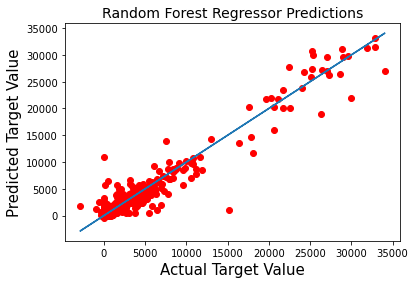

In [57]:
#depicting the predictions on a scatter plot
plt.plot(y_test,y_test)
plt.scatter(y_test,predictions_rf,color="red")
plt.xlabel('Actual Target Value',fontsize=15)
plt.ylabel('Predicted Target Value',fontsize=15)
plt.title('Random Forest Regressor Predictions',fontsize=14)
plt.show()

LINEAR REGRESSION MODEL 

In [58]:
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression().fit(X, y)

In [59]:
#linear regression score
lr_reg.score(X, y)

0.004564907994019096

In [60]:
#regression coefficient
lr_reg.coef_

array([ -0.49189142, -14.81869535,  -8.76421067,   6.86308965,
         0.22269412])

Predictions for Linear Regression Model

In [61]:
predictions_lr=lr_reg.predict(X_test)

In [62]:
rmse_lr=np.sqrt(metrics.mean_squared_error(y_test,predictions_lr))
rsquare_lr=metrics.r2_score(y_test,predictions_lr)

In [63]:
print('RMSE VALUE: ',rmse_lr)
print('R2 VALUE: ',rsquare_lr)

RMSE VALUE:  312.5541931378338
R2 VALUE:  0.0042004915882217775


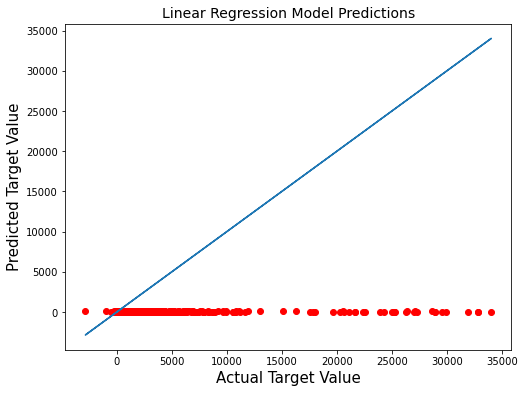

In [64]:
#depicting the predictions on a scatter plot
plt.figure(figsize=(8,6))
plt.plot(y_test,y_test)
plt.scatter(y_test,predictions_lr,color="red")
plt.xlabel('Actual Target Value',fontsize=15)
plt.ylabel('Predicted Target Value',fontsize=15)
plt.title('Linear Regression Model Predictions',fontsize=14)
plt.show()